average the 3 scans per location as one inflection point and create a box and whisker plot of these values and overlay the raw points on top of the boxplot. there should be 4 box and whisker plots (below code)

In [ ]:
import data_read
import matplotlib.pyplot as plt
import numpy as np

# Initialize lists to store inflection points (depth and intensity) per location
save_inflection_point_depth = []
save_inflection_point_intensity = []

# Example for Vivosight and Epidermal Data
vivosight_folder = "data/Vivosight_data/"
scan_folder = "data/scan_information/"

#Grab all subject ids
subject_ids = data_read.get_all_subject_ids(vivosight_folder)


# subject_id = "A52"
# subject_data = data_read.process_subject_vivosight_data(subject_id, vivosight_folder, scan_folder, "epidermal")

# Group the inflection points by location
location_post_dict = {1: [], 2: [], 3: [], 4: []}  # Assuming 4 locations (1-4)
location_pre_dict = {1: [], 2: [], 3: [], 4: []}  # Assuming 4 locations (1-4)

# subject_ids = ["M16"]  # For testing, you can specify a single subject ID

for subject_id in subject_ids:
    subject_data = data_read.process_subject_vivosight_data(subject_id,vivosight_folder,scan_folder, "epidermal")

    # Loop through each dermal scan and process the inflection points
    for derm_scan in subject_data.visit.epidermal:
        derm_scan.get_normalize_a_scan()
        

        if derm_scan.location < 1 or derm_scan.location > 4:
            print(f"{subject_id}Location {derm_scan.location} is out of range. Skipping this scan.")
            continue

        # Try approach 1
        derm_scan.approach_1(15)
        if derm_scan.min_location_index is None:
            derm_scan.approach_2(15, 200)

        # Save the inflection points (depths) and corresponding intensity values
        inflection_depth = derm_scan.depth_data["Depth"][derm_scan.min_location_index]
        inflection_intensity = derm_scan.depth_data["Mean A-scan"][derm_scan.min_location_index]
        
        # Append the inflection points to the appropriate location
        if derm_scan.exposed == True:
            location_post_dict[derm_scan.location].append((inflection_depth))
        elif derm_scan.exposed == False:
            location_pre_dict[derm_scan.location].append((inflection_depth))


pre_averages = {}
post_averages = {}
for loc, data in location_pre_dict.items():
    pre_averages[loc] = np.average(data)

for loc, data in location_post_dict.items():
    post_averages[loc] = np.average(data)


print(pre_averages,post_averages)


# # Now, calculate the average inflection points per location
# averaged_inflection_points = {
#     loc: {
#         "depth": np.mean([point[0] for point in points]),
#         "intensity": np.mean([point[1] for point in points])
#     }
#     for loc, points in location_dict.items() if len(points) > 0
# }

# # Now, let's prepare the data for plotting
# depths_per_location = []
# intensities_per_location = []
# raw_depths = []
# raw_intensities = []

# for loc, points in location_dict.items():
#     depths_per_location.append([point[0] for point in points])
#     intensities_per_location.append([point[1] for point in points])
#     raw_depths.extend([point[0] for point in points])
#     raw_intensities.extend([point[1] for point in points])

# # Plotting the boxplot with raw points overlaid
# plt.figure(figsize=(10, 6))

# # Create the boxplot for depths
# plt.boxplot(depths_per_location, positions=[1, 2, 3, 4], widths=0.5, patch_artist=True, boxprops=dict(facecolor='skyblue', color='blue'), medianprops=dict(color='blue'))

# # Overlay raw points for depth
# plt.scatter([np.random.normal(loc, 0.05) for loc in [1, 2, 3, 4] for _ in range(len(raw_depths))],
#             raw_depths, color='red', label='Raw Depth Points', alpha=0.5)

# # Create the boxplot for intensities
# plt.boxplot(intensities_per_location, positions=[1, 2, 3, 4], widths=0.5, patch_artist=True, boxprops=dict(facecolor='lightgreen', color='green'), medianprops=dict(color='green'))

# # Overlay raw points for intensity
# plt.scatter([np.random.normal(loc, 0.05) for loc in [1, 2, 3, 4] for _ in range(len(raw_intensities))],
#             raw_intensities, color='orange', label='Raw Intensity Points', alpha=0.5)

# # Set plot labels and title
# plt.xlabel("Location")
# plt.ylabel("Value")
# plt.title("Boxplot of Inflection Points by Location with Raw Data Overlaid")

# # Add legend and grid
# plt.legend(loc='upper left')
# plt.grid(True)
# plt.tight_layout()

# # Show the plot
# plt.show()

# # Print the averaged inflection points per location
# print("Averaged Inflection Points (Depth and Intensity) per Location:")
# for loc, stats in averaged_inflection_points.items():
#     print(f"Location {loc}: Depth = {stats['depth']}, Intensity = {stats['intensity']}")


data/Vivosight_data/A52_Results None
data/Vivosight_data/A52_2_Results None
data/Vivosight_data/W40_Results None
data/Vivosight_data/M16_Results None
data/Vivosight_data/M16_2_Results None
data/Vivosight_data/F12_Results None
data/Vivosight_data/L71_Results None
data/Vivosight_data/L71_2_Results None
data/Vivosight_data/B05_Results None
data/Vivosight_data/B05_2_Results None
data/Vivosight_data/P38_Results None
data/Vivosight_data/U34_Results None
data/Vivosight_data/U34_2_Results None
data/Vivosight_data/R09_Results None
data/Vivosight_data/N64_Results None
data/Vivosight_data/L81_Results None
data/Vivosight_data/L81_2_Results None
data/Vivosight_data/C14_Results None
data/Vivosight_data/E50_Results None
data/Vivosight_data/Z47_Results None


In [2]:
print(location_pre_dict)

{1: [0.0770667, 0.0770667, 0.0770667, 0.0997333, 0.0997333, 0.0997333, 0.0816, 0.0770667, 0.0816, 0.0997333, 0.0952, 0.0952, 0.0816, 0.0770667, 0.0770667, 0.0725333, 0.0725333, 0.0770667, 0.0906667, 0.0906667, 0.0906667, 0.068, 0.0725333, 0.068, 0.1088, 0.113333, 0.104267, 0.0725333, 0.0725333, 0.0725333, 0.1088, 0.0997333, 0.0952, 0.1088, 0.117867, 0.1088, 0.0770667, 0.0816, 0.0770667, 0.0906667, 0.0906667, 0.0906667, 0.0952, 0.0997333, 0.104267, 0.0997333, 0.0952, 0.0906667, 0.0906667, 0.0906667, 0.0952, 0.0725333, 0.068, 0.068, 0.0861333, 0.0906667, 0.0861333, 0.0725333, 0.0725333, 0.0725333], 2: [0.0770667, 0.0770667, 0.0770667, 0.113333, 0.113333, 0.113333, 0.0861333, 0.0952, 0.0952, 0.0906667, 0.0906667, 0.0906667, 0.0770667, 0.0770667, 0.0770667, 0.0725333, 0.0725333, 0.0725333, 0.0906667, 0.0906667, 0.0906667, 0.0770667, 0.0725333, 0.0770667, 0.113333, 0.1088, 0.113333, 0.0725333, 0.0725333, 0.068, 0.113333, 0.1088, 0.1088, 0.117867, 0.113333, 0.113333, 0.0906667, 0.0906667, 0.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def remove_outliers(data):
    if len(data) == 0:
        return data
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return [x for x in data if lower_bound <= x <= upper_bound]

# Apply outlier removal to each location's data
combined_data = [remove_outliers(location_pre_dict[loc]) for loc in [1,2,3,4]] + \
                [remove_outliers(location_post_dict[loc]) for loc in [1,2,3,4]]

combined_labels = [f"Pre-{loc}" for loc in [1,2,3,4]] + [f"Post-{loc}" for loc in [1,2,3,4]]

# Plot without the extreme outlier values
plt.figure(figsize=(14, 6))
plt.boxplot(combined_data, labels=combined_labels)
plt.title("Inflection Depths Pre- and Post-Exposure by Location (Outliers Removed)")
plt.ylabel("Inflection Depth (mm)")
plt.xlabel("Condition and Location")
plt.grid(True)
plt.show()

Paired plot - need to get rid of outlier value

data/Vivosight_data/A52_Results None
data/Vivosight_data/A52_2_Results None
data/Vivosight_data/W40_Results None
data/Vivosight_data/M16_Results None
data/Vivosight_data/M16_2_Results None
data/Vivosight_data/F12_Results None
data/Vivosight_data/L71_Results None
data/Vivosight_data/L71_2_Results None
data/Vivosight_data/B05_Results None
data/Vivosight_data/B05_2_Results None
data/Vivosight_data/P38_Results None
data/Vivosight_data/U34_Results None
data/Vivosight_data/U34_2_Results None
data/Vivosight_data/R09_Results None
data/Vivosight_data/N64_Results None
data/Vivosight_data/L81_Results None
data/Vivosight_data/L81_2_Results None
data/Vivosight_data/C14_Results None
data/Vivosight_data/E50_Results None
data/Vivosight_data/Z47_Results None
data/Vivosight_data/E11_Results None
data/Vivosight_data/T98_Results None
data/Vivosight_data/G07_Results None
data/Vivosight_data/G07_2_Results None
data/Vivosight_data/D47_Results None
data/Vivosight_data/Y20_Results None
data/Vivosight_data/R98_

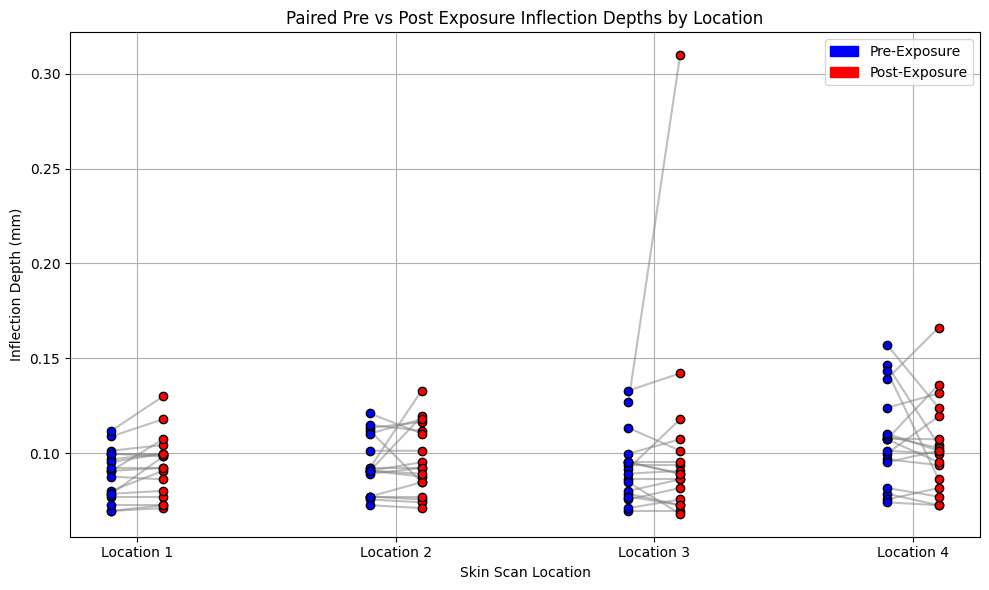

In [3]:
import data_read
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

# Initialize per-subject per-location storage
subject_pre_data = {}  # {subject_id: {location: [depths]}}
subject_post_data = {}

vivosight_folder = "data/Vivosight_data/"
scan_folder = "data/scan_information/"
subject_ids = data_read.get_all_subject_ids(vivosight_folder)

for subject_id in subject_ids:
    subject_data = data_read.process_subject_vivosight_data(subject_id, vivosight_folder, scan_folder, "epidermal")

    if subject_id not in subject_pre_data:
        subject_pre_data[subject_id] = {1: [], 2: [], 3: [], 4: []}
        subject_post_data[subject_id] = {1: [], 2: [], 3: [], 4: []}

    for derm_scan in subject_data.visit.epidermal:
        derm_scan.get_normalize_a_scan()
        if derm_scan.location not in [1, 2, 3, 4]:
            continue

        derm_scan.approach_1(15)
        if derm_scan.min_location_index is None:
            derm_scan.approach_2(15, 200)

        inflection_depth = derm_scan.depth_data["Depth"][derm_scan.min_location_index]

        if derm_scan.exposed:
            subject_post_data[subject_id][derm_scan.location].append(inflection_depth)
        else:
            subject_pre_data[subject_id][derm_scan.location].append(inflection_depth)

# Plotting all locations on one plot
plt.figure(figsize=(10, 6))

# Assign x-axis positions: 1 = Loc1, 2 = Loc2, 3 = Loc3, 4 = Loc4
for loc in [1, 2, 3, 4]:
    for subject_id in subject_ids:
        pre_vals = subject_pre_data.get(subject_id, {}).get(loc, [])
        post_vals = subject_post_data.get(subject_id, {}).get(loc, [])

        if pre_vals and post_vals:
            avg_pre = np.mean(pre_vals)
            avg_post = np.mean(post_vals)

            # X positions: offset slightly for clarity
            x_vals = [loc - 0.1, loc + 0.1]
            y_vals = [avg_pre, avg_post]

            # Gray line
            plt.plot(x_vals, y_vals, color='gray', alpha=0.5)

            # Blue pre dot
            plt.scatter(loc - 0.1, avg_pre, color='blue', edgecolor='black', zorder=3)
            # Red post dot
            plt.scatter(loc + 0.1, avg_post, color='red', edgecolor='black', zorder=3)

            # Legend handles
            blue_patch = mpatches.Patch(color='blue', label='Pre-Exposure')
            red_patch = mpatches.Patch(color='red', label='Post-Exposure')
            plt.legend(handles=[blue_patch, red_patch], loc='upper right')

# Labeling
plt.xticks([1, 2, 3, 4], [f"Location {i}" for i in range(1, 5)])
plt.xlabel("Skin Scan Location")
plt.ylabel("Inflection Depth (mm)")
plt.title("Paired Pre vs Post Exposure Inflection Depths by Location")
plt.grid(True)
plt.tight_layout()
plt.show()


In [12]:
from scipy.stats import ttest_rel, wilcoxon

# Loop through locations 1 to 4
for loc in [1, 2, 3, 4]:
    pre_vals = []
    post_vals = []

    for subject_id in subject_ids:
        pre = subject_pre_data.get(subject_id, {}).get(loc, [])
        post = subject_post_data.get(subject_id, {}).get(loc, [])

        if pre and post:
            pre_avg = np.mean(pre)
            post_avg = np.mean(post)
            pre_vals.append(pre_avg)
            post_vals.append(post_avg)

    if len(pre_vals) < 3:
        print(f"Location {loc}: Not enough paired data to run test (n={len(pre_vals)})")
        continue

    # Perform paired t-test
    t_stat, p_val_ttest = ttest_rel(pre_vals, post_vals)

    # Perform Wilcoxon signed-rank test
    try:
        w_stat, p_val_wilcoxon = wilcoxon(pre_vals, post_vals)
    except ValueError:
        p_val_wilcoxon = np.nan  # if wilcoxon fails

    print(f"Location {loc} results:")
    print(f"  Paired t-test:      t = {t_stat:.2f}, p = {p_val_ttest:.4f}")
    print(f"  Wilcoxon test:      p = {p_val_wilcoxon:.4f}\n")

Location 1 results:
  Paired t-test:      t = -3.06, p = 0.0071
  Wilcoxon test:      p = 0.0031

Location 2 results:
  Paired t-test:      t = -0.75, p = 0.4607
  Wilcoxon test:      p = 0.6191

Location 3 results:
  Paired t-test:      t = -1.03, p = 0.3169
  Wilcoxon test:      p = 0.6908

Location 4 results:
  Paired t-test:      t = 0.88, p = 0.3922
  Wilcoxon test:      p = 0.4423



In [ ]:
# Step 1: Gather all post-exposure averages at Location 3
location = 3
post_depths_loc3 = []
subject_map = {}  # Map from depth to subject_id

for subject_id in subject_ids:
    post_vals = subject_post_data.get(subject_id, {}).get(location, [])
    if post_vals:
        avg_post = np.mean(post_vals)
        post_depths_loc3.append(avg_post)
        subject_map[avg_post] = subject_id  # Assuming unique avg value

# Step 2: Compute IQR and find outliers
q1 = np.percentile(post_depths_loc3, 25)
q3 = np.percentile(post_depths_loc3, 75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Step 3: Identify and print outliers
print("Outlier(s) in Location 3 post-exposure inflection depth:")
for val in post_depths_loc3:
    if val < lower_bound or val > upper_bound:
        print(f"Subject ID: {subject_map[val]} | Average Post Depth: {val:.2f}")


Outlier(s) in Location 3 post-exposure inflection depth:
Subject ID: W40 | Average Post Depth: 0.14
Subject ID: R09 | Average Post Depth: 0.31


In [13]:
from scipy.stats import shapiro

# Loop through each location
for loc in [1, 2, 3, 4]:
    pre_vals = []
    post_vals = []

    for subject_id in subject_ids:
        pre = subject_pre_data.get(subject_id, {}).get(loc, [])
        post = subject_post_data.get(subject_id, {}).get(loc, [])

        if pre and post:
            pre_avg = np.mean(pre)
            post_avg = np.mean(post)
            pre_vals.append(pre_avg)
            post_vals.append(post_avg)

    if len(pre_vals) < 3:
        print(f"Location {loc}: Not enough data for normality testing.")
        continue

    # Calculate differences
    diffs = np.array(post_vals) - np.array(pre_vals)

    # Shapiro-Wilk normality test
    shapiro_stat, shapiro_p = shapiro(diffs)

    print(f"Location {loc} Shapiro-Wilk normality test: p = {shapiro_p:.4f}")
    if shapiro_p > 0.05:
        print(f"  ➔ Differences are likely normally distributed (p > 0.05)\n")
    else:
        print(f"  ➔ Differences are NOT normally distributed (p < 0.05)\n")


Location 1 Shapiro-Wilk normality test: p = 0.0014
  ➔ Differences are NOT normally distributed (p < 0.05)

Location 2 Shapiro-Wilk normality test: p = 0.0028
  ➔ Differences are NOT normally distributed (p < 0.05)

Location 3 Shapiro-Wilk normality test: p = 0.0000
  ➔ Differences are NOT normally distributed (p < 0.05)

Location 4 Shapiro-Wilk normality test: p = 0.0935
  ➔ Differences are likely normally distributed (p > 0.05)



return data (only return information does not include initial)

In [6]:
import data_read
import matplotlib.pyplot as plt
import numpy as np

# Initialize lists to store inflection points (depth and intensity) per location
save_inflection_point_depth = []
save_inflection_point_intensity = []

# Example for Vivosight and Epidermal Data
vivosight_folder = "data/Vivosight_data/"
scan_folder = "data/scan_information/"

#Grab all subject ids
subject_ids = data_read.get_all_subject_ids(vivosight_folder)


# subject_id = "A52"
# subject_data = data_read.process_subject_vivosight_data(subject_id, vivosight_folder, scan_folder, "epidermal")

# Group the inflection points by location
location_post_dict = {1: [], 2: [], 3: [], 4: []}  # Assuming 4 locations (1-4)
location_pre_dict = {1: [], 2: [], 3: [], 4: []}  # Assuming 4 locations (1-4)

# subject_ids = ["M16"]  # For testing, you can specify a single subject ID

for subject_id in subject_ids:
    subject_data = data_read.process_subject_vivosight_data(subject_id,vivosight_folder,scan_folder, "epidermal")

    # Only proceed if return_visit is not None
    if subject_data.return_visit is not None:
        for derm_scan in subject_data.visit.epidermal:
            derm_scan.get_normalize_a_scan()
        

            if derm_scan.location < 1 or derm_scan.location > 4:
                print(f"{subject_id}Location {derm_scan.location} is out of range. Skipping this scan.")
                continue

            # Try approach 1
            derm_scan.approach_1(15)
            if derm_scan.min_location_index is None:
                derm_scan.approach_2(15, 200)

            # Save the inflection points (depths) and corresponding intensity values
            inflection_depth = derm_scan.depth_data["Depth"][derm_scan.min_location_index]
            inflection_intensity = derm_scan.depth_data["Mean A-scan"][derm_scan.min_location_index]
            
            # Append the inflection points to the appropriate location
            if derm_scan.exposed == True:
                location_post_dict[derm_scan.location].append((inflection_depth))
            elif derm_scan.exposed == False:
                location_pre_dict[derm_scan.location].append((inflection_depth))


pre_averages = {}
post_averages = {}
for loc, data in location_pre_dict.items():
    pre_averages[loc] = np.average(data)

for loc, data in location_post_dict.items():
    post_averages[loc] = np.average(data)


print(pre_averages,post_averages)

data/Vivosight_data/A52_Results None
data/Vivosight_data/A52_2_Results None
data/Vivosight_data/W40_Results None
data/Vivosight_data/M16_Results None
data/Vivosight_data/M16_2_Results None
data/Vivosight_data/F12_Results None
data/Vivosight_data/L71_Results None
data/Vivosight_data/L71_2_Results None
data/Vivosight_data/B05_Results None
data/Vivosight_data/B05_2_Results None
data/Vivosight_data/P38_Results None
data/Vivosight_data/U34_Results None
data/Vivosight_data/U34_2_Results None
data/Vivosight_data/R09_Results None
data/Vivosight_data/N64_Results None
data/Vivosight_data/L81_Results None
data/Vivosight_data/L81_2_Results None
data/Vivosight_data/C14_Results None
data/Vivosight_data/E50_Results None
data/Vivosight_data/Z47_Results None
data/Vivosight_data/E11_Results None
data/Vivosight_data/T98_Results None
data/Vivosight_data/G07_Results None
data/Vivosight_data/G07_2_Results None
data/Vivosight_data/D47_Results None
data/Vivosight_data/Y20_Results None
data/Vivosight_data/R98_

In [7]:
import data_read
import matplotlib.pyplot as plt
import numpy as np

# Setup
vivosight_folder = "data/Vivosight_data/"
scan_folder = "data/scan_information/"
subject_ids = data_read.get_all_subject_ids(vivosight_folder)

# Data containers
initial_pre = {1: [], 2: [], 3: [], 4: []}
initial_post = {1: [], 2: [], 3: [], 4: []}
return_pre = {1: [], 2: [], 3: [], 4: []}
return_post = {1: [], 2: [], 3: [], 4: []}

for subject_id in subject_ids:
    subject_data = data_read.process_subject_vivosight_data(subject_id, vivosight_folder, scan_folder, "epidermal")

    visit_type = "return" if subject_id.endswith("_2") else "initial"

    for derm_scan in subject_data.visit.epidermal:
        derm_scan.get_normalize_a_scan()

        if derm_scan.location not in [1, 2, 3, 4]:
            continue

        derm_scan.approach_1(15)
        if derm_scan.min_location_index is None:
            derm_scan.approach_2(15, 200)

        inflection_depth = derm_scan.depth_data["Depth"][derm_scan.min_location_index]

        if visit_type == "initial":
            if derm_scan.exposed:
                initial_post[derm_scan.location].append(inflection_depth)
            else:
                initial_pre[derm_scan.location].append(inflection_depth)
        else:
            if derm_scan.exposed:
                return_post[derm_scan.location].append(inflection_depth)
            else:
                return_pre[derm_scan.location].append(inflection_depth)

data/Vivosight_data/A52_Results None
data/Vivosight_data/A52_2_Results None
data/Vivosight_data/W40_Results None
data/Vivosight_data/M16_Results None
data/Vivosight_data/M16_2_Results None
data/Vivosight_data/F12_Results None
data/Vivosight_data/L71_Results None
data/Vivosight_data/L71_2_Results None
data/Vivosight_data/B05_Results None
data/Vivosight_data/B05_2_Results None
data/Vivosight_data/P38_Results None
data/Vivosight_data/U34_Results None
data/Vivosight_data/U34_2_Results None
data/Vivosight_data/R09_Results None
data/Vivosight_data/N64_Results None
data/Vivosight_data/L81_Results None
data/Vivosight_data/L81_2_Results None
data/Vivosight_data/C14_Results None
data/Vivosight_data/E50_Results None
data/Vivosight_data/Z47_Results None
data/Vivosight_data/E11_Results None
data/Vivosight_data/T98_Results None
data/Vivosight_data/G07_Results None
data/Vivosight_data/G07_2_Results None
data/Vivosight_data/D47_Results None
data/Vivosight_data/Y20_Results None
data/Vivosight_data/R98_

return and initial taking subject level averages and making 16 boxplots

In [11]:
import data_read
import matplotlib.pyplot as plt
import numpy as np

# Setup
vivosight_folder = "data/Vivosight_data/"
scan_folder = "data/scan_information/"
subject_ids = data_read.get_all_subject_ids(vivosight_folder)

# Initialize: store subject-level average inflection depths
initial_pre_avg = {1: [], 2: [], 3: [], 4: []}
initial_post_avg = {1: [], 2: [], 3: [], 4: []}
return_pre_avg = {1: [], 2: [], 3: [], 4: []}
return_post_avg = {1: [], 2: [], 3: [], 4: []}

# Loop through subjects
for subject_id in subject_ids:
    subject_data = data_read.process_subject_vivosight_data(subject_id, vivosight_folder, scan_folder, "epidermal")
    visit_type = "return" if subject_id.endswith("_2") else "initial"

    # Temporary per-location grouping for this subject
    pre_temp = {1: [], 2: [], 3: [], 4: []}
    post_temp = {1: [], 2: [], 3: [], 4: []}

    for derm_scan in subject_data.visit.epidermal:
        derm_scan.get_normalize_a_scan()

        if derm_scan.location not in [1, 2, 3, 4]:
            continue

        derm_scan.approach_1(15)
        if derm_scan.min_location_index is None:
            derm_scan.approach_2(15, 200)

        inflection_depth = derm_scan.depth_data["Depth"][derm_scan.min_location_index]

        if derm_scan.exposed:
            post_temp[derm_scan.location].append(inflection_depth)
        else:
            pre_temp[derm_scan.location].append(inflection_depth)

    # Compute and store subject-level averages
    for loc in [1, 2, 3, 4]:
        if pre_temp[loc]:
            avg_pre = np.mean(pre_temp[loc])
            if visit_type == "initial":
                initial_pre_avg[loc].append(avg_pre)
            else:
                return_pre_avg[loc].append(avg_pre)

        if post_temp[loc]:
            avg_post = np.mean(post_temp[loc])
            if visit_type == "initial":
                initial_post_avg[loc].append(avg_post)
            else:
                return_post_avg[loc].append(avg_post)



data/Vivosight_data/A52_Results None
data/Vivosight_data/A52_2_Results None
data/Vivosight_data/W40_Results None
data/Vivosight_data/M16_Results None
data/Vivosight_data/M16_2_Results None
data/Vivosight_data/F12_Results None
data/Vivosight_data/L71_Results None
data/Vivosight_data/L71_2_Results None
data/Vivosight_data/B05_Results None
data/Vivosight_data/B05_2_Results None
data/Vivosight_data/P38_Results None
data/Vivosight_data/U34_Results None
data/Vivosight_data/U34_2_Results None
data/Vivosight_data/R09_Results None
data/Vivosight_data/N64_Results None
data/Vivosight_data/L81_Results None
data/Vivosight_data/L81_2_Results None
data/Vivosight_data/C14_Results None
data/Vivosight_data/E50_Results None
data/Vivosight_data/Z47_Results None
data/Vivosight_data/E11_Results None
data/Vivosight_data/T98_Results None
data/Vivosight_data/G07_Results None
data/Vivosight_data/G07_2_Results None
data/Vivosight_data/D47_Results None
data/Vivosight_data/Y20_Results None
data/Vivosight_data/R98_

updated return and initial code (below)

In [13]:
import data_read
import matplotlib.pyplot as plt
import numpy as np

# Setup paths
vivosight_folder = "data/Vivosight_data/"
scan_folder = "data/scan_information/"
subject_ids = data_read.get_all_subject_ids(vivosight_folder)

# Initialize dictionaries to hold subject-level average inflection depths
initial_pre_avg = {1: [], 2: [], 3: [], 4: []}
initial_post_avg = {1: [], 2: [], 3: [], 4: []}
return_pre_avg = {1: [], 2: [], 3: [], 4: []}
return_post_avg = {1: [], 2: [], 3: [], 4: []}

# Loop through unique subject IDs (without "_2")
for subject_id in subject_ids:
    # Process both initial and return visits
    subject = data_read.process_subject_vivosight_data(subject_id, vivosight_folder, scan_folder, "epidermal")

    # Only proceed if both visits are available
    if subject.visit is None or subject.return_visit is None:
        continue

    # Function to group scans by exposure and location
    def compute_avg_by_location(scan_list):
        pre_temp = {1: [], 2: [], 3: [], 4: []}
        post_temp = {1: [], 2: [], 3: [], 4: []}

        for derm_scan in scan_list:
            derm_scan.get_normalize_a_scan()

            if derm_scan.location not in [1, 2, 3, 4]:
                continue

            derm_scan.approach_1(15)
            if derm_scan.min_location_index is None:
                derm_scan.approach_2(15, 200)

            if derm_scan.min_location_index is None:
                continue  # skip if still no valid inflection point

            inflection_depth = derm_scan.depth_data["Depth"][derm_scan.min_location_index]

            if derm_scan.exposed:
                post_temp[derm_scan.location].append(inflection_depth)
            else:
                pre_temp[derm_scan.location].append(inflection_depth)

        # Compute per-location averages
        pre_avg = {loc: np.mean(vals) for loc, vals in pre_temp.items() if vals}
        post_avg = {loc: np.mean(vals) for loc, vals in post_temp.items() if vals}
        return pre_avg, post_avg

    # Get averages for initial and return visits
    init_pre, init_post = compute_avg_by_location(subject.visit.epidermal)
    ret_pre, ret_post = compute_avg_by_location(subject.return_visit.epidermal)

    # Add to final group-level dictionaries
    for loc in [1, 2, 3, 4]:
        if loc in init_pre:
            initial_pre_avg[loc].append(init_pre[loc])
        if loc in init_post:
            initial_post_avg[loc].append(init_post[loc])
        if loc in ret_pre:
            return_pre_avg[loc].append(ret_pre[loc])
        if loc in ret_post:
            return_post_avg[loc].append(ret_post[loc])


data/Vivosight_data/A52_Results None
data/Vivosight_data/A52_2_Results None
data/Vivosight_data/W40_Results None
data/Vivosight_data/M16_Results None
data/Vivosight_data/M16_2_Results None
data/Vivosight_data/F12_Results None
data/Vivosight_data/L71_Results None
data/Vivosight_data/L71_2_Results None
data/Vivosight_data/B05_Results None
data/Vivosight_data/B05_2_Results None
data/Vivosight_data/P38_Results None
data/Vivosight_data/U34_Results None
data/Vivosight_data/U34_2_Results None
data/Vivosight_data/R09_Results None
data/Vivosight_data/N64_Results None
data/Vivosight_data/L81_Results None
data/Vivosight_data/L81_2_Results None
data/Vivosight_data/C14_Results None
data/Vivosight_data/E50_Results None
data/Vivosight_data/Z47_Results None
data/Vivosight_data/E11_Results None
data/Vivosight_data/T98_Results None
data/Vivosight_data/G07_Results None
data/Vivosight_data/G07_2_Results None
data/Vivosight_data/D47_Results None
data/Vivosight_data/Y20_Results None
data/Vivosight_data/R98_

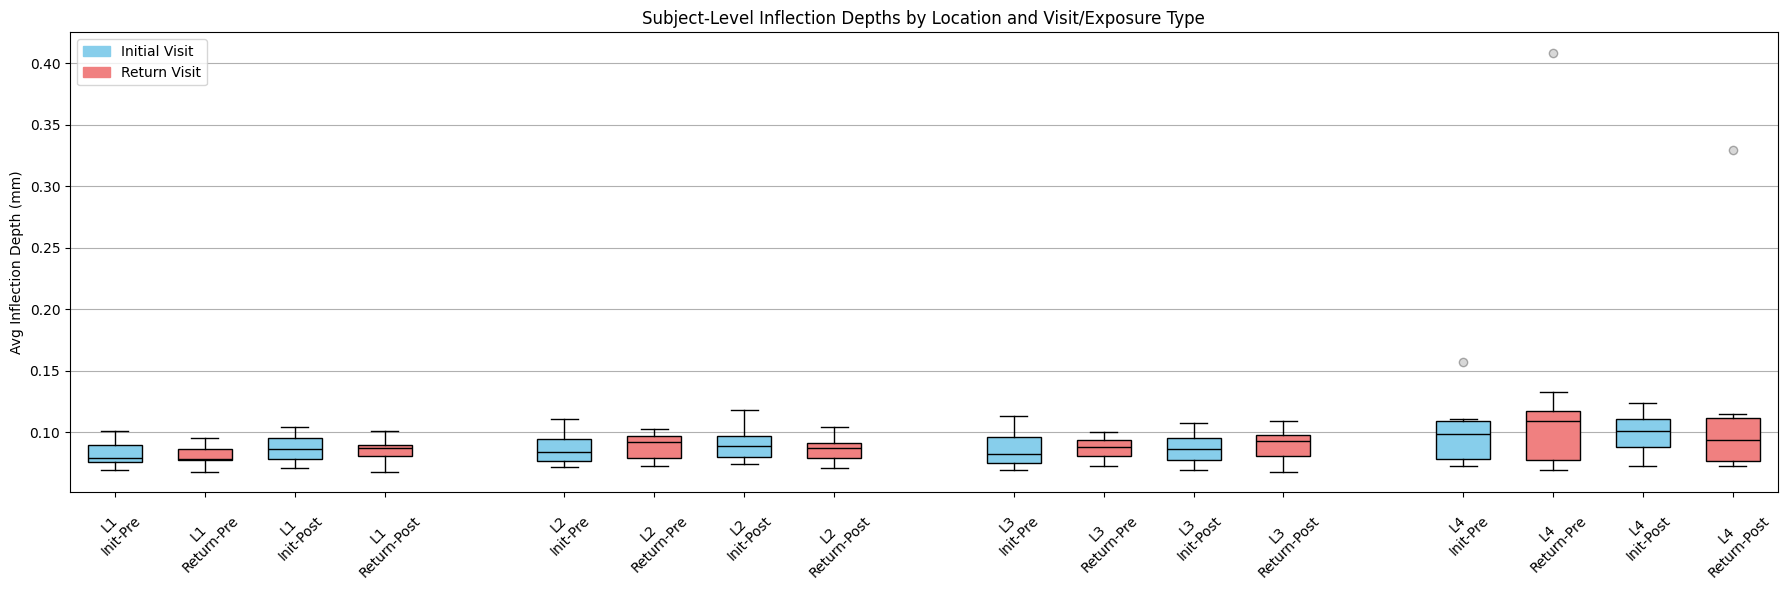

In [14]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Group data and labels for plotting
plot_data = []
plot_labels = []
plot_colors = []
plot_positions = []

position = 1

for loc in [1, 2, 3, 4]:
    # Initial Pre
    plot_data.append(initial_pre_avg[loc])
    plot_labels.append(f"L{loc}\nInit-Pre")
    plot_colors.append('skyblue')
    plot_positions.append(position)
    position += 1

    # Return Pre
    plot_data.append(return_pre_avg[loc])
    plot_labels.append(f"L{loc}\nReturn-Pre")
    plot_colors.append('lightcoral')
    plot_positions.append(position)
    position += 1

    # Initial Post
    plot_data.append(initial_post_avg[loc])
    plot_labels.append(f"L{loc}\nInit-Post")
    plot_colors.append('skyblue')
    plot_positions.append(position)
    position += 1

    # Return Post
    plot_data.append(return_post_avg[loc])
    plot_labels.append(f"L{loc}\nReturn-Post")
    plot_colors.append('lightcoral')
    plot_positions.append(position)
    position += 2  # extra space between locations

# Create the plot
plt.figure(figsize=(18, 6))

# Draw colored boxes manually
for i in range(len(plot_data)):
    bplot = plt.boxplot(
        plot_data[i],
        positions=[plot_positions[i]],
        widths=0.6,
        patch_artist=True,
        boxprops=dict(facecolor=plot_colors[i], color='black'),
        medianprops=dict(color='black'),
        whiskerprops=dict(color='black'),
        capprops=dict(color='black'),
        flierprops=dict(markerfacecolor='gray', marker='o', alpha=0.3)
    )

# Formatting
plt.xticks(plot_positions, plot_labels, rotation=45)
plt.ylabel("Avg Inflection Depth (mm)")
plt.title("Subject-Level Inflection Depths by Location and Visit/Exposure Type")
plt.grid(True, axis='y')
plt.tight_layout()

# Legend
plt.legend(handles=[
    mpatches.Patch(color='skyblue', label='Initial Visit'),
    mpatches.Patch(color='lightcoral', label='Return Visit')
], loc='upper left')

plt.show()


In [4]:
import data_read
import matplotlib.pyplot as plt
import numpy as np

# Initialize a list to store inflection point depths
save_inflection_point_depth = []

# Example for Vivosight and Epidermal Data
vivosight_folder = "data/Vivosight_data/"
scan_folder = "data/scan_information/"

subject_id = "A52"
subject_data = data_read.process_subject_vivosight_data(subject_id, vivosight_folder, scan_folder, "epidermal")

# Group the inflection points by location
location_dict = {1: [], 2: [], 3: [], 4: []}  # Assuming 4 locations (1-4)

# Loop through each dermal scan and process the inflection points
for derm_scan in subject_data.visit.epidermal:
    derm_scan.get_normalize_a_scan()
    
    # Try approach 1
    derm_scan.approach_1(15)
    if derm_scan.min_location_index is None:
        derm_scan.approach_2(15, 200)

    # Save the inflection points (depths)
    inflection_depth = derm_scan.depth_data["Depth"][derm_scan.min_location_index]
    
    # Append the inflection points to the appropriate location
    location_dict[derm_scan.location].append(inflection_depth)

# Now, calculate the average inflection points per location
averaged_inflection_points = {
    loc: np.mean(points)
    for loc, points in location_dict.items() if len(points) > 0
}

# Now, let's prepare the data for plotting
depths_per_location = []
raw_depths = []

for loc, points in location_dict.items():
    depths_per_location


data/Vivosight_data/A52_Results None
data/Vivosight_data/A52_2_Results None
